In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import json

In [34]:
with open("typology/tree.json","r") as f:
    tree = json.load(f)
    
def parse_tree(name,items):
    for obj in items:
        if obj['name']==name:
            return obj
        if obj['children'] is not None:
            items+=obj['children']   
            
parse_tree("Carbon pricing",tree)

{'name': 'Carbon pricing',
 'parent': 'Economic instruments',
 'children': [{'name': 'Border Carbon Adjustment',
   'parent': 'Carbon pricing',
   'children': None},
  {'name': 'Emissions trading', 'parent': 'Carbon pricing', 'children': None},
  {'name': 'Subsidy removal', 'parent': 'Carbon pricing', 'children': None},
  {'name': 'Tax', 'parent': 'Carbon pricing', 'children': None}]}

(450, 104)


,id,title,content,0 - relevant,10 - 3. Quantitative,10 - 4. Qualitative,11 - countries,12 - policy name,2 - 0. Mitigation,2 - 1. Adaptation,...,8 - 11. Ocean systems,8 - 12. Food,"8 - 13. Human settlements, industry and infrastructure","8 - 14. Human health, well-being and security",8 - 15. Cross-sectoral,9 - 0. Ex-post,9 - 1. Ex-ante,9 - 2. Ex-ante (IAM),INCLUDE,random
2,3556,Will economic restructuring in China reduce tr...,We calculate carbon dioxide (CO2) emissions em...,1.0,1.0,NaN,China,NaN,1.0,0.0,...,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,1.0,0
5,4793,An emerging equilibrium in the EU emissions tr...,The European Union's Emissions Trading Scheme ...,1.0,1.0,0.0,0,NaN,1.0,0.0,...,0.0,0.0,0.0,0.0,NaN,1.0,NaN,0.0,1.0,0
10,17205,A fuel surcharge policy for reducing road traf...,This paper proposes a car pricing policy based...,1.0,1.0,0.0,NaN,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
11,17339,Innovation and Climate Change Policy,This paper examines whether climate change pol...,1.0,NaN,0.0,0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,1.0,0
13,20095,"Promoting the ""Development dividend"" of climat...",Future climate change policy in developing cou...,1.0,0.0,0.0,ThailandPhilippinesIndia,0,1.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0


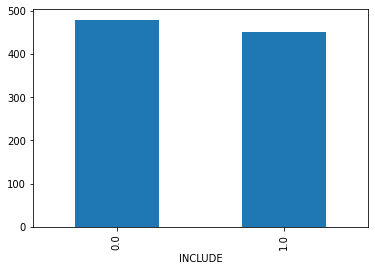

In [7]:
df = pd.read_csv('data/0_labelled_documents.csv')

df.groupby('INCLUDE').size().plot.bar()
df = df[df['INCLUDE']==1]
print(df.shape)
df.head()

['3 - 1. Analysis of an existing policy / concrete proposal',
 '3 - 2. Analysis of a generic policy',
 '3 - 3. Broader governance and policy']

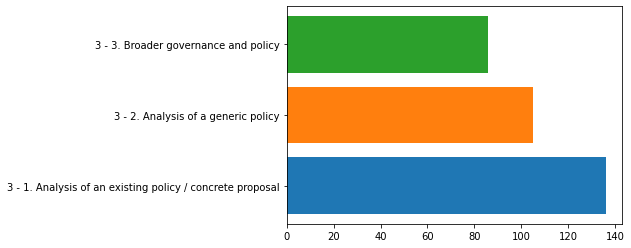

In [4]:
policy = [x for x in df.columns if re.match("^3 - ",x) and "Not policy" not in x]

fig, ax = plt.subplots()
for i,x in enumerate(policy):
    ax.barh(i, df[x].sum())
    
ax.set_yticks(range(len(policy)))
ax.set_yticklabels(policy)
policy

In [13]:
p1 = [x for x in df.columns if re.match("^4 - ",x) and "Not policy" not in x]
p2 = [x for x in df.columns if re.match("^5 - ",x) and "Not policy" not in x]
p3 = [x for x in df.columns if re.match("^6 - ",x) and "Not policy" not in x]
hrs = []
for i in range(len(p1)):
    hrs.append(len([x for x in p2 if f"- {i+1}." in x]))
    
hrs
p2hrs

[13, 14, 4, 9, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

['4 - 1. Economic instruments', '4 - 2. Regulatory Instruments', '4 - 3. Information, education and training', '4 - 4. Governance, strategies and targets', '4 - 5. Agreements']


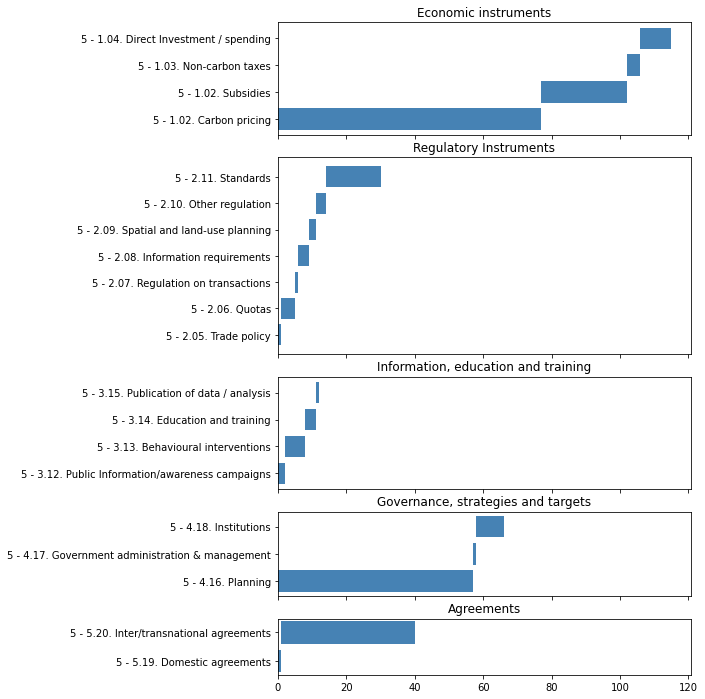

In [55]:


print(p1)

fig, axs = plt.subplots(len(p1), figsize=(7.4,12),gridspec_kw={'height_ratios': hrs},sharex=True)
for i,x in enumerate(p1):
    ax = axs[i]
    ax.set_title(x.split(". ")[1])
    cindex = x.split(". ")[0].replace("4 -","5 -") + "."
    p2sub = [p for p in p2 if cindex in p]
    
    l = 0
    for j,p in enumerate(p2sub):
        n =  df[p].astype("float").sum()
        ax.barh(j, n, left=l, color="steelblue")
        l+=n
    
    ax.set_yticks(range(len(p2sub)))
    ax.set_yticklabels(p2sub)

Agreements


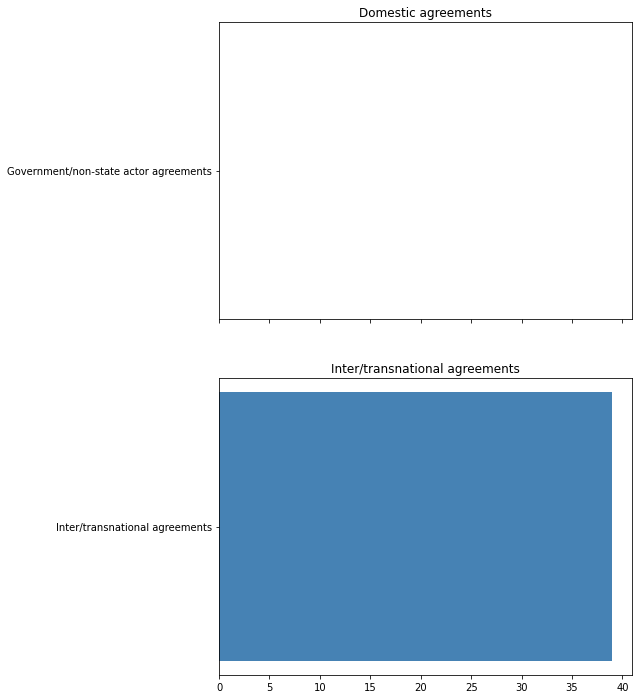

Economic instruments


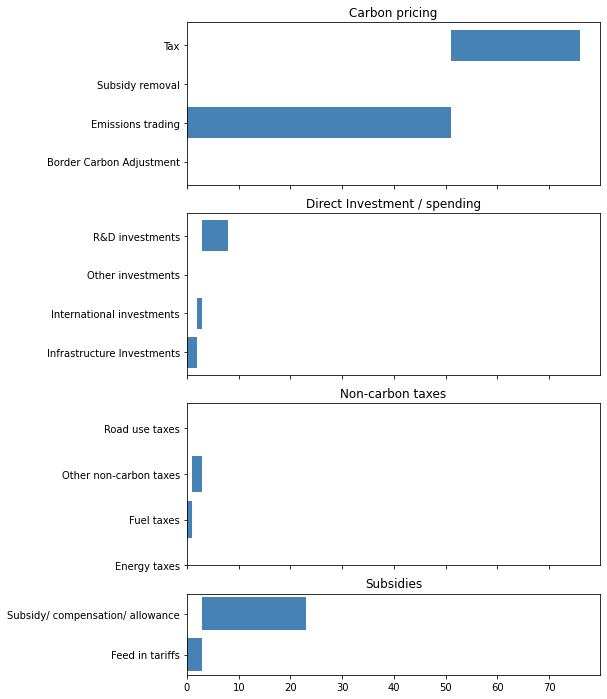

Governance, strategies and targets


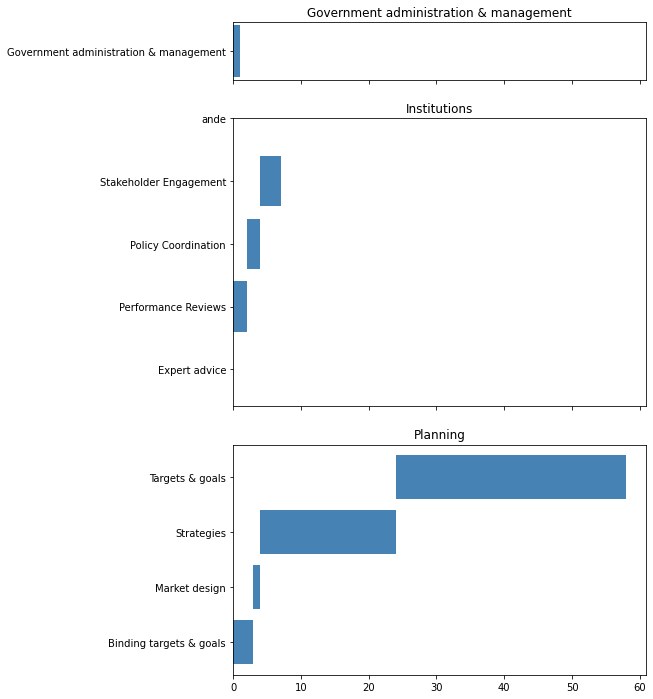

Information, education and training


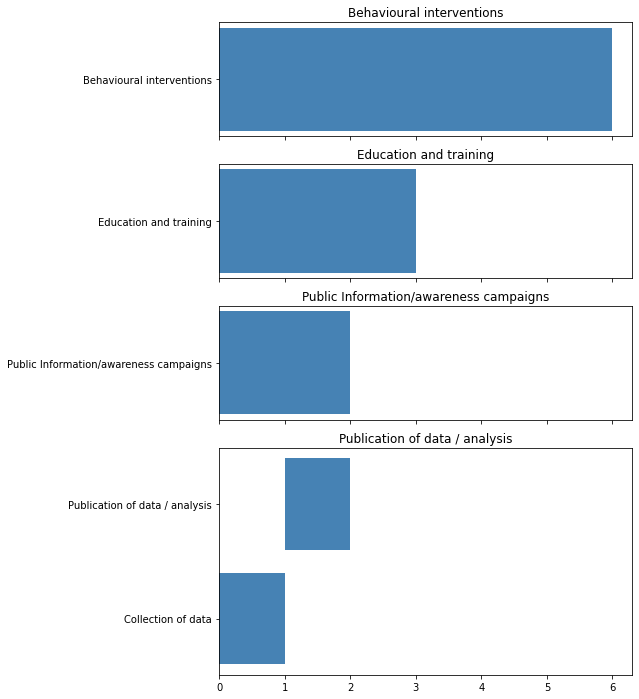

Regulatory Instruments


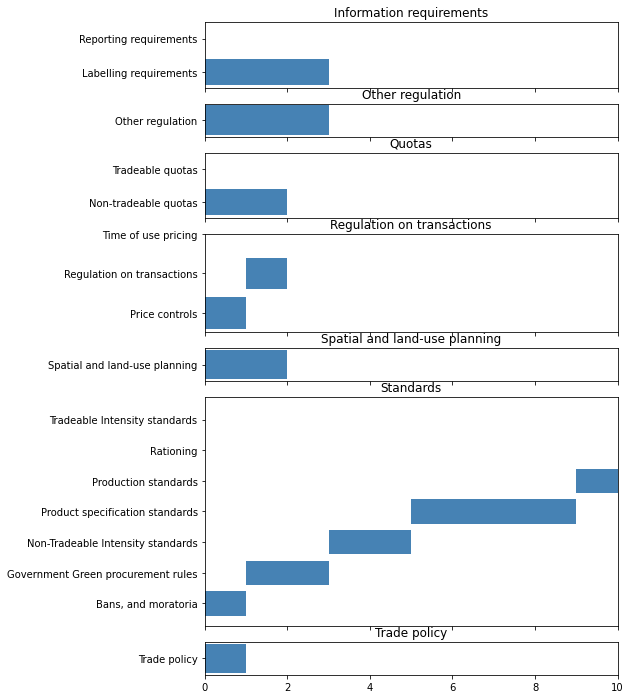

In [56]:
for i,x in enumerate(tree[0]['children']):
    print(x['name'])
    p2hrs = [len(c['children']) for c in x['children']]
    fig, axs = plt.subplots(len(x['children']),figsize=(7.4,12),gridspec_kw={'height_ratios': p2hrs},sharex=True)
    for j, p in enumerate(x['children']):
        ax = axs[j]
        ax.set_title(p['name'])
        l = 0        
        for k, pp in enumerate(p['children']):
            dfc = [c for c in df.columns if pp['name'] in c]
            if len(dfc)==0:
                continue
            else:
                dfc = dfc[0]
            n =  df[dfc].astype("float").sum()
            ax.barh(k, n, left=l, color="steelblue")
            l+=n
            
        ax.set_yticks(range(len(p['children'])))
        ax.set_yticklabels([pp['name'] for pp in p['children']])
            
    plt.show()


In [48]:
pp['name']

'Energy taxes'

['6 - 1.02. Border Carbon Adjustment']


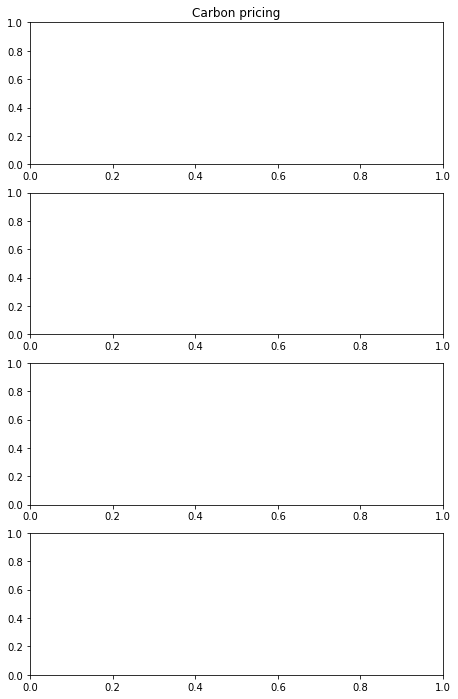

In [20]:


for i,x in enumerate(p1):

    cindex = x.split(". ")[0].replace("4 -","5 -") + "."
    p2sub = [p for p in p2 if cindex in p]
    
    fig, axs = plt.subplots(len(p2sub), figsize=(7.4,12))#,gridspec_kw={'height_ratios': p2hrs},sharex=True)
    
    for j, p in enumerate(p2sub):
        ax = axs[j]
        ax.set_title(p.split(". ")[1])
        name
        p3sub = [p for p in p3 if cindex in p]
        print(p3sub)
        break
        l = 0
        for j,p in enumerate(p3sub):
            n =  df[p].astype("float").sum()
            ax.barh(j, n, left=l)
            l+=n
    
        ax.set_yticks(range(len(p3sub)))
        ax.set_yticklabels(p3sub)
        
    plt.show()
    break

In [21]:
p

'5 - 1.02. Carbon pricing'

In [22]:
p3

['6 - 1.01. Tax',
 '6 - 1.02. Border Carbon Adjustment',
 '6 - 1.03. Subsidy/ compensation/ allowance',
 '6 - 1.04. Feed in tariffs',
 '6 - 1.05. Emissions trading',
 '6 - 1.06. Subsidy removal',
 '6 - 1.08. Fuel taxes',
 '6 - 1.09. Road use taxes',
 '6 - 1.10. Other non-carbon taxes',
 '6 - 1.11. Infrastructure Investments',
 '6 - 1.12. R&D investments',
 '6 - 1.13. International investments',
 '6 - 1.14. Other investments',
 '6 - 2.02. Tradeable quotas',
 '6 - 2.03. Non-tradeable quotas',
 '6 - 2.06. Price controls',
 '6 - 2.07. Reporting requirements',
 '6 - 2.08. Labelling requirements',
 '6 - 2.09. Spatial and land-use planning',
 '6 - 2.10. Other regulation',
 '6 - 2.11. Tradeable Intensity standards',
 '6 - 2.12. Non-Tradeable Intensity standards',
 '6 - 2.13. Product specification standards',
 '6 - 2.14. Production standards',
 '6 - 2.15. Government Green procurement rules',
 '6 - 2.16. Rationing',
 '6 - 2.17. Bans, and moratoria',
 '6 - 3.02. Behavioural interventions',
 '6 - 